- add all plots to visuals folder

In [1]:
import pandas as pd
df = pd.read_csv("/Users/miaalex/Desktop/indian-fashion-trends/data/myntra_womens_dresses.csv")

# Basic preview
print(df.shape)
df.head()
df.info()
df.isnull().sum()

(50, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                50 non-null     object 
 1   Name                 50 non-null     object 
 2   Link                 50 non-null     object 
 3   Discounted_Price     50 non-null     int64  
 4   Original_Price       50 non-null     int64  
 5   Discount_Percentage  50 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


Brand                  0
Name                   0
Link                   0
Discounted_Price       0
Original_Price         0
Discount_Percentage    0
dtype: int64

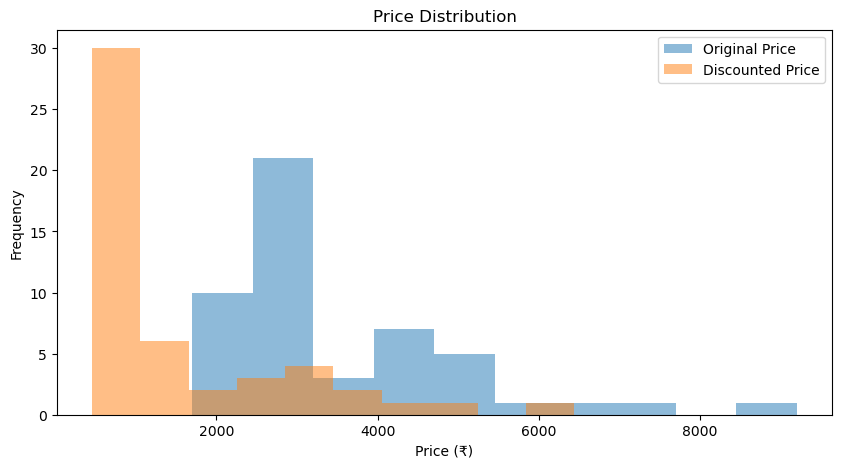

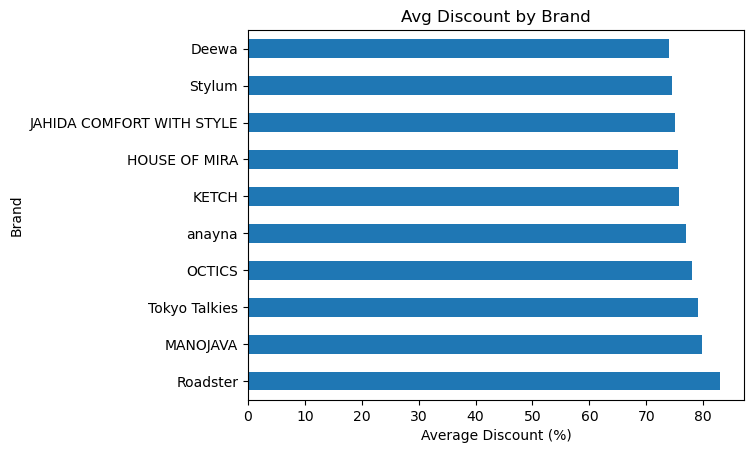

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['Original_Price'].plot(kind='hist', alpha=0.5, label='Original Price')
df['Discounted_Price'].plot(kind='hist', alpha=0.5, label='Discounted Price')
plt.legend()
plt.title("Price Distribution")
plt.xlabel("Price (₹)")
plt.show()


brand_discount = df.groupby('Brand')['Discount_Percentage'].mean().sort_values(ascending=False).head(10)

brand_discount.plot(kind='barh', title='Avg Discount by Brand')
plt.xlabel("Average Discount (%)")
plt.show()

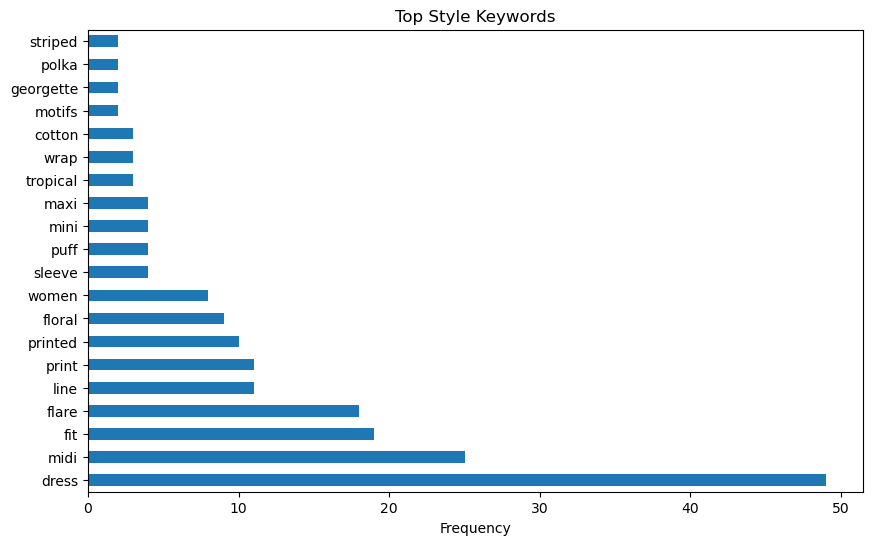

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(df['Name'])

# Get top 50 keywords
keyword_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_keywords = keyword_freq.sum().sort_values(ascending=False)

top_keywords.head(20).plot(kind='barh', figsize=(10,6), title="Top Style Keywords")
plt.xlabel("Frequency")
plt.show()

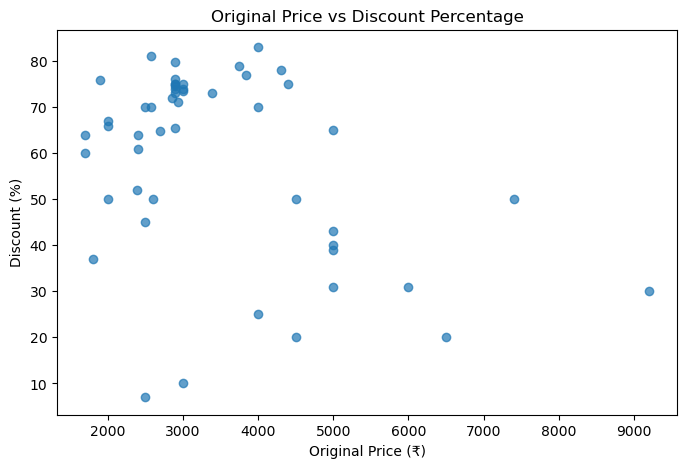

<Figure size 1000x600 with 0 Axes>

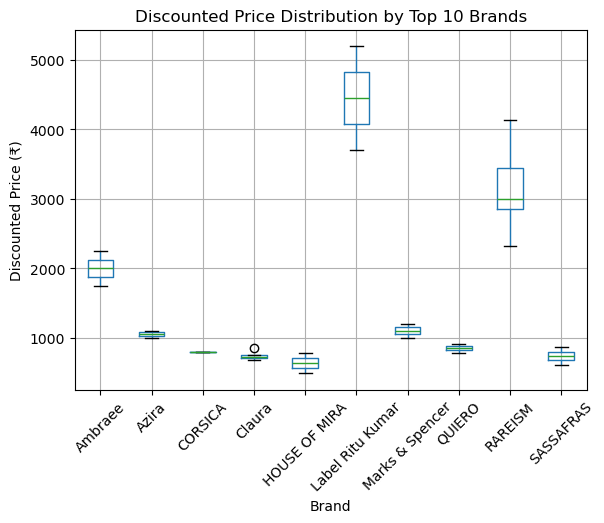

In [4]:
# Scatter plot of Original Price vs Discount %
plt.figure(figsize=(8,5))
plt.scatter(df['Original_Price'], df['Discount_Percentage'], alpha=0.7)
plt.title("Original Price vs Discount Percentage")
plt.xlabel("Original Price (₹)")
plt.ylabel("Discount (%)")
plt.show()

# Boxplot of Discounted Prices by Brand (Top 10 Brands by count)
top_brands = df['Brand'].value_counts().head(10).index
plt.figure(figsize=(10,6))
df[df['Brand'].isin(top_brands)].boxplot(column='Discounted_Price', by='Brand', rot=45)
plt.title("Discounted Price Distribution by Top 10 Brands")
plt.suptitle("")
plt.ylabel("Discounted Price (₹)")
plt.show()


- Scatter plot → answers: Do expensive dresses get bigger discounts, or not?
- Boxplot → answers: Which brands dominate affordable vs premium segments? Are they consistent or varied in pricing?

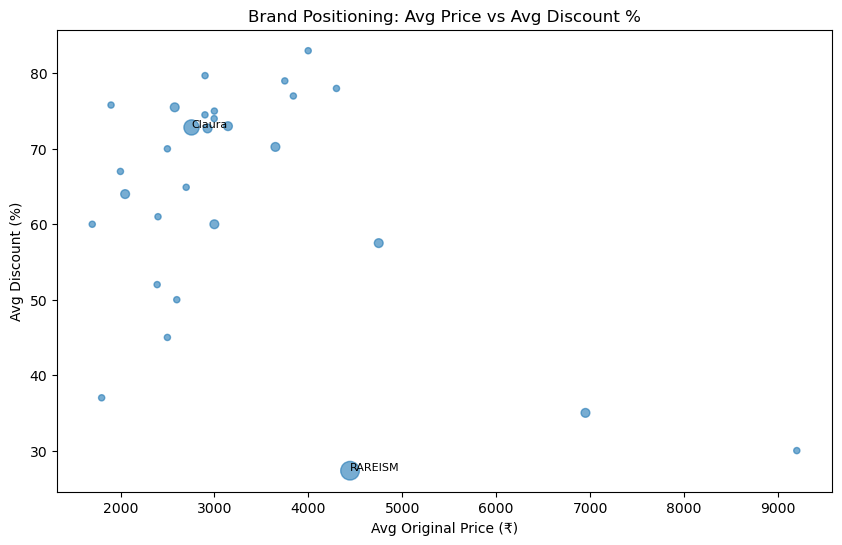

In [5]:
# Average Original Price vs Avg Discount % per Brand
brand_stats = df.groupby('Brand').agg({
    'Original_Price':'mean',
    'Discount_Percentage':'mean',
    'Discounted_Price':'mean',
    'Brand':'count'
}).rename(columns={'Brand':'Count'}).reset_index()

plt.figure(figsize=(10,6))
plt.scatter(brand_stats['Original_Price'], brand_stats['Discount_Percentage'], 
            s=brand_stats['Count']*20, alpha=0.6)
for i, row in brand_stats.iterrows():
    if row['Count'] > 2:  # annotate only brands with >2 items
        plt.text(row['Original_Price'], row['Discount_Percentage'], row['Brand'], fontsize=8)

plt.title("Brand Positioning: Avg Price vs Avg Discount %")
plt.xlabel("Avg Original Price (₹)")
plt.ylabel("Avg Discount (%)")
plt.show()


Which brands dominate the dataset? → via the bubble sizes (Count).

Do higher-priced brands get better ratings? → X (price) vs Y (rating).

Are there budget brands that still perform well in ratings? → Look for bubbles on the left (cheap) but high up (high rating).

Do popular brands (big bubbles) cluster at certain price/rating ranges?

Example: Maybe most popular brands are mid-priced and around ~4 stars.

Which brands stand out as outliers?

Like one brand with super high prices but low ratings.

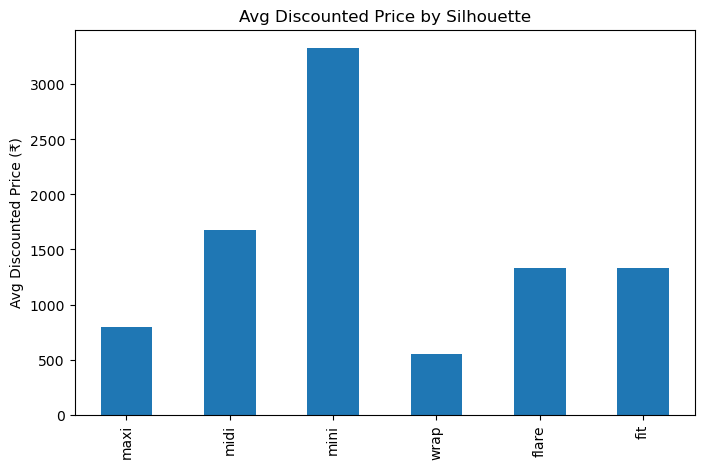

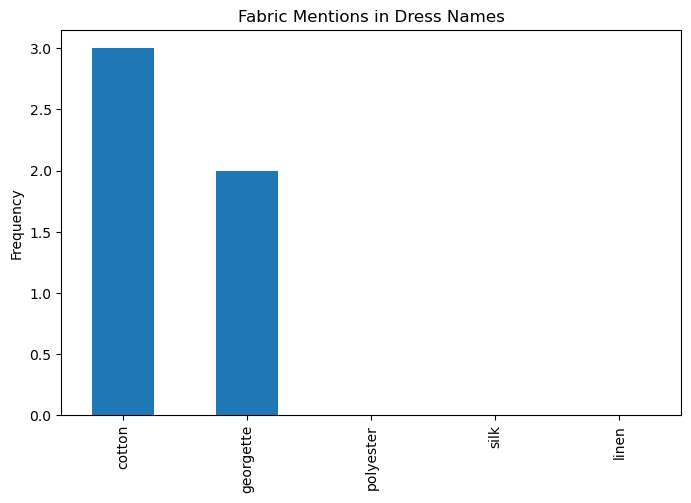

In [6]:
# Extract some silhouette and fabric-related keywords
silhouettes = ['maxi', 'midi', 'mini', 'wrap', 'flare', 'fit']
fabrics = ['cotton', 'georgette', 'polyester', 'silk', 'linen']

# Check average discounted price for each silhouette
silhouette_prices = {}
for s in silhouettes:
    mask = df['Name'].str.lower().str.contains(s)
    if mask.sum() > 0:
        silhouette_prices[s] = df[mask]['Discounted_Price'].mean()

pd.Series(silhouette_prices).plot(kind='bar', title="Avg Discounted Price by Silhouette", figsize=(8,5))
plt.ylabel("Avg Discounted Price (₹)")
plt.show()

# Check fabric popularity
fabric_counts = {}
for f in fabrics:
    mask = df['Name'].str.lower().str.contains(f)
    fabric_counts[f] = mask.sum()

pd.Series(fabric_counts).plot(kind='bar', title="Fabric Mentions in Dress Names", figsize=(8,5))
plt.ylabel("Frequency")
plt.show()


Which silhouettes are more expensive on average?

Which fabrics show up most often in product titles?

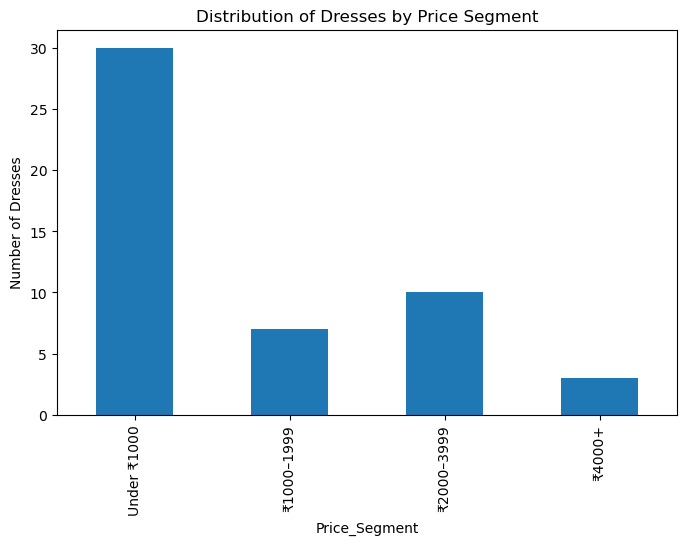

In [7]:
# Create price buckets
bins = [0, 999, 1999, 3999, 9999]
labels = ['Under ₹1000', '₹1000–1999', '₹2000–3999', '₹4000+']
df['Price_Segment'] = pd.cut(df['Discounted_Price'], bins=bins, labels=labels)

price_segment_counts = df['Price_Segment'].value_counts().sort_index()

price_segment_counts.plot(kind='bar', figsize=(8,5), title="Distribution of Dresses by Price Segment")
plt.ylabel("Number of Dresses")
plt.show()


How are dresses distributed across different price ranges?
→ The binning (pd.cut) groups the Discounted_Price column into price segments like Under ₹1000, ₹1000–1999, ₹2000–3999, ₹4000+.
→ This tells you whether most dresses are cheap, mid-range, or premium.

Which price segment dominates?
→ By counting (value_counts) how many dresses fall into each price bucket, you can see whether the majority are budget-friendly or skewed toward higher-end prices.

Is the price distribution balanced or skewed?
→ The bar chart visually shows whether one segment has way more products than others (e.g., 70% under ₹1000 vs. only 5% above ₹4000).

Indirect / Deeper Questions You Could Derive

Where do brands focus their product lineup?
If most dresses fall into Under ₹1000, it suggests mass-market targeting. If skewed toward higher buckets, the site may lean toward premium fashion.

What does this mean for customers?
It gives a picture of affordability: are most customers shopping budget-friendly or luxury?

Could you compare brands within these buckets later?
Absolutely — you could redo this grouped by Brand to see if certain brands are mostly budget vs. premium.

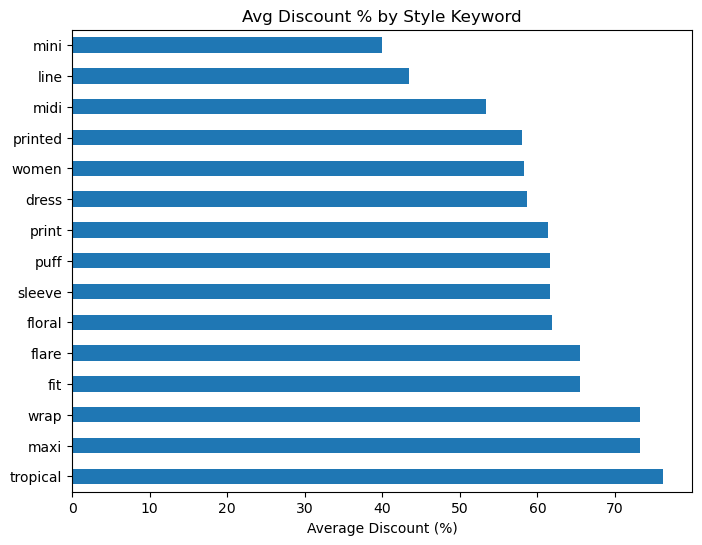

In [8]:
# Which keywords are linked with higher discounts?
keyword_discounts = {}
for kw in top_keywords.index[:15]:  # top 15 keywords
    mask = df['Name'].str.lower().str.contains(kw)
    if mask.sum() > 0:
        keyword_discounts[kw] = df[mask]['Discount_Percentage'].mean()

pd.Series(keyword_discounts).sort_values(ascending=False).plot(
    kind='barh', figsize=(8,6), title="Avg Discount % by Style Keyword"
)
plt.xlabel("Average Discount (%)")
plt.show()


Which fashion keywords (e.g., kurta, dress, sari, lehenga) are linked to higher discounts?

Do certain categories consistently get aggressively discounted (e.g., ethnic wear, casual tops)?

Are premium or trendy keywords (like gown, denim, saree) discounted less because they retain value?